# Import necessary libraries and load the data:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load train data
train_df = pd.read_csv(r"C:\Users\surya\Desktop\train.csv")

# Load test data
test_df = pd.read_csv(r"C:\Users\surya\Desktop\test.csv")

# Exploratory Data Analysis (EDA):

<AxesSubplot:>

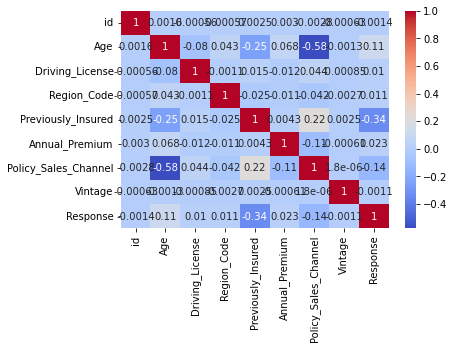

In [3]:
# Check the distribution of target variable in the training data
sns.countplot(x='Response', data=train_df)

# Check correlation between variables
corr = train_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


# Data Preprocessing:

In [4]:
# Handle missing values
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)

# Scale numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df[['Age', 'Region_Code', 'Annual_Premium', 'Vintage']] = scaler.fit_transform(train_df[['Age', 'Region_Code', 'Annual_Premium', 'Vintage']])
test_df[['Age', 'Region_Code', 'Annual_Premium', 'Vintage']] = scaler.transform(test_df[['Age', 'Region_Code', 'Annual_Premium', 'Vintage']])


# Model Selection and Training:

In [5]:
# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop(['id', 'Response'], axis=1), train_df['Response'], test_size=0.2, random_state=0)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the validation set
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8765841882920942


C:\Users\surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


An accuracy score of 0.8765841882920942 means that the model correctly predicted the target variable (i.e. whether the customer is interested in Vehicle Insurance or not) for 87.66% of the samples in the test set.

# Predictions on Test Data:

In [7]:
# Make predictions on the test data
test_ids = test_df['id']
test_pred = model.predict(test_df.drop(['id'], axis=1))

# Create a submission file
submission_df = pd.DataFrame({'id': test_ids, 'Response': test_pred})


In [9]:
submission_df

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [11]:
submission_df['Response'].value_counts()

0    126994
1        43
Name: Response, dtype: int64

it seems that out of the total test data, only 43 customers were predicted to be interested in purchasing vehicle insurance provided by the insurance company.